# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [4]:

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.
mice = merge["Mouse ID"].value_counts()
mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#select columns by index
m_t = merge[['Mouse ID','Timepoint']]
m_t

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#identify duplicate columns.
df = pd.DataFrame(m_t)
df.duplicated
#
df = df.drop_duplicates(subset=['Mouse ID'])
df

,Mouse ID,Timepoint
0,k403,0
10,s185,0
20,x401,0
30,m601,0
40,g791,0
...,...,...
1858,z314,0
1860,z435,0
1863,z581,0
1873,z795,0


In [8]:
# check if duplicate values have been dropped.
boolean = not df["Mouse ID"].is_unique     
boolean = df['Mouse ID'].duplicated().any() 
boolean


False

In [9]:
# Checking the number of mice in the clean DataFrame.
df.count()

Mouse ID     249
Timepoint    249
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df2 = pd.merge(df, merge, how="outer", on=["Mouse ID", "Timepoint"])
df2
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = df2.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = df2.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = df2.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev = df2.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
err = df2.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#create dataframes for each property.
mean_df = pd.DataFrame(mean)
median_df = pd.DataFrame(median)
var_df = pd.DataFrame(variance)
std_dev_df = pd.DataFrame(std_dev)
err_df = pd.DataFrame(err)
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume" : mean, "Median Tumor Volume" : median,
                        "Tumor Volume Variance" : variance, "Tumor Volume Std. Dev" : std_dev, "Tumor Volume Std. Err." : err })
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

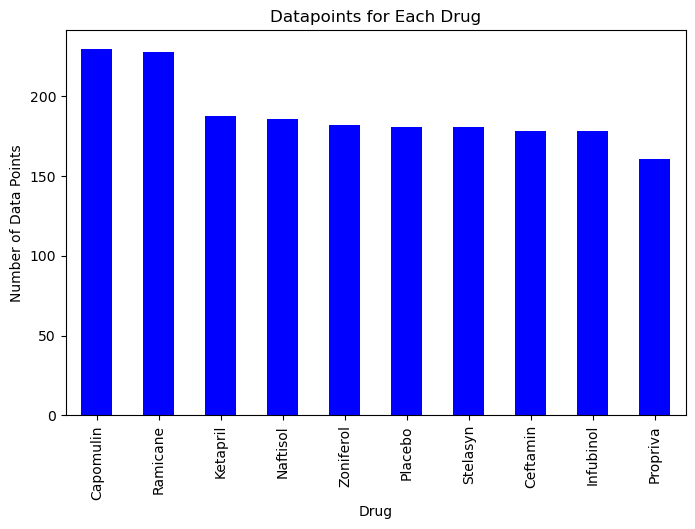

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen
#dataframe.plot method.

c_r = df2.groupby("Drug Regimen")
graph_info = c_r["Timepoint"].count().sort_values(ascending=False)
# We apply align="edge" to ensure our bars line up with our tick marks
graph = graph_info.plot(kind = "bar", color = "blue", figsize = (8,5), align = "center")

# Tell matplotlib where we would like to place each of our x axis headers
plt.title("Datapoints for Each Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Data Points")
plt.show()


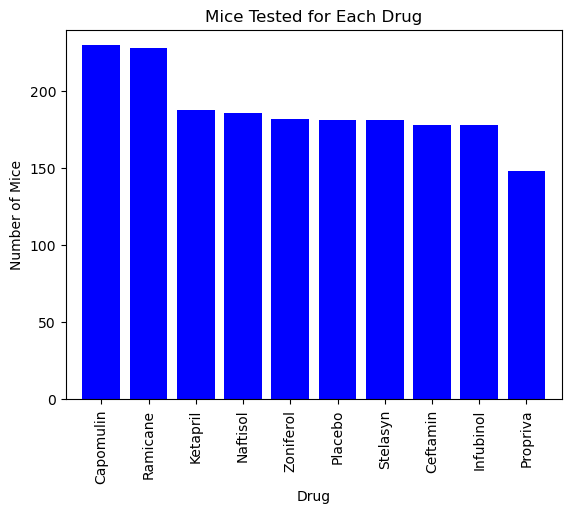

In [17]:
#Create the second bar chart showing the number of mice tested for each drug with Matplotlib's `pyplot` methods.
#name our variables
mice_count = df2["Drug Regimen"].value_counts()
types_of_drug = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", 
         "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
mice_y_axis = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(mice_y_axis))
plt.bar(x_axis, mice_y_axis, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, types_of_drug, rotation=90)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(mice_y_axis)+10)
# Tell matplotlib where we would like to place each of our x axis headers
plt.title("Mice Tested for Each Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")
plt.show()



In [18]:
df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,s185,0,Capomulin,Female,3,17,45.000000,0
2,x401,0,Capomulin,Female,16,15,45.000000,0
3,m601,0,Capomulin,Male,22,17,45.000000,0
4,g791,0,Ramicane,Male,11,16,45.000000,0
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


[Text(0, 0.5, '')]

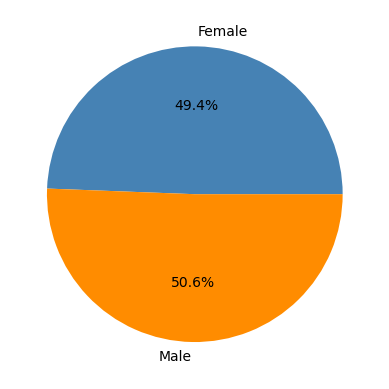

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#copy df2 clean DataFrame
dist = df2.copy()
dist = dist.groupby(["Sex"])
distdata = dist.count()
distdata
column_name = distdata.columns[0]
distdata = distdata.rename(columns={column_name: "Number of Data Points"})
axis = distdata.plot.pie(y="Number of Data Points",autopct="%1.1f%%", legend=False, colors = ["steelblue","darkorange"])
axis.set(ylabel="")

([<matplotlib.patches.Wedge at 0x241e2f9c1f0>,
 [Text(-0.017402739560472946, -1.0998623298648746, 'Male'),
  Text(0.01740273956047308, 1.0998623298648746, 'Female')],
 [Text(-0.009492403396621607, -0.5999249071990225, '50.6%'),
  Text(0.00949240339662168, 0.5999249071990225, '49.4%')])

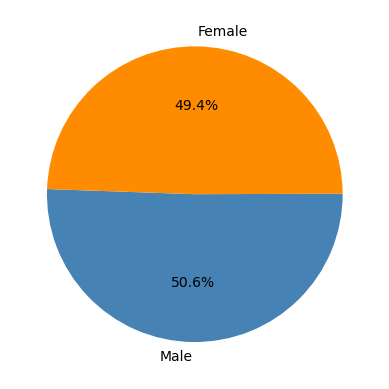

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [distdata.loc["Male"]["Number of Data Points"], distdata.loc["Female"]["Number of Data Points"]]
plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["steelblue", "darkorange"])


## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#CAPOMULIN
#use loc function
fin_vol = df2.copy()
cap = fin_vol.loc[fin_vol["Drug Regimen"] == "Capomulin",:]
ram = fin_vol.loc[fin_vol["Drug Regimen"] == "Ramicane",:]
inf = fin_vol.loc[fin_vol["Drug Regimen"] == "Infubinol",:]
ceft = fin_vol.loc[fin_vol["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
caplast = cap.groupby("Mouse ID").max()["Timepoint"]
caplastvol = pd.DataFrame(caplast)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_merge = pd.merge(caplastvol, fin_vol, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [88]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors = cap_merge["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile range of tumor volume is {lower_q}.")
print(f"The lower quartile range of tumor volume is {upper_q}.")
print(f"The interquartile range of tumor volume is {iqr}.")  
    # Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iqr)   
upper_bound = upper_q + (1.5*iqr)
print(f"Outliers in the Capomulin dataset can appear as values below {lower_bound} and above {upper_bound}.")

The lower quartile range of tumor volume is 48.72207785.
The lower quartile range of tumor volume is 64.29983003.
The interquartile range of tumor volume is 15.577752179999997.
Outliers in the Capomulin dataset can appear as values below 25.355449580000002 and above 87.66645829999999.


In [89]:
#RAMICANE
ram = fin_vol.loc[fin_vol["Drug Regimen"] == "Ramicane",:]
ramlast = ram.groupby("Mouse ID").max()["Timepoint"]
ramlastvol = pd.DataFrame(ramlast)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ram_merge = pd.merge(ramlastvol, fin_vol, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [90]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_tumors = ram_merge["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile range of tumor volume is {lower_q}.")
print(f"The lower quartile range of tumor volume is {upper_q}.")
print(f"The interquartile range of tumor volume is {iqr}.")    
    # Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iqr)   
upper_bound = upper_q + (1.5*iqr)
print(f"Outliers in the Ramicane dataset can appear as values below {lower_bound} and above {upper_bound}.")

The lower quartile range of tumor volume is 48.72207785.
The lower quartile range of tumor volume is 64.29983003.
The interquartile range of tumor volume is 15.577752179999997.
Outliers in the Ramicane dataset can appear as values below 25.355449580000002 and above 87.66645829999999.


In [91]:
# INFUBINOL
inf = fin_vol.loc[fin_vol["Drug Regimen"] == "Infubinol",:]
inflast = inf.groupby("Mouse ID").max()["Timepoint"]
inflastvol = pd.DataFrame(inflast)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
inf_merge = pd.merge(inflastvol, fin_vol, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [92]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_tumors = inf_merge["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile range of tumor volume is {lower_q}.")
print(f"The lower quartile range of tumor volume is {upper_q}.")
print(f"The interquartile range of tumor volume is {iqr}.")    
    # Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iqr)   
upper_bound = upper_q + (1.5*iqr)
print(f"Outliers in the Infubinol dataset can appear as values below {lower_bound} and above {upper_bound}.")

The lower quartile range of tumor volume is 48.72207785.
The lower quartile range of tumor volume is 64.29983003.
The interquartile range of tumor volume is 15.577752179999997.
Outliers in the Infubinol dataset can appear as values below 25.355449580000002 and above 87.66645829999999.


In [93]:
# CEFTAMIN
ceft = fin_vol.loc[fin_vol["Drug Regimen"] == "Ceftamin",:]
ceftlast = ceft.groupby("Mouse ID").max()["Timepoint"]
ceftlastvol = pd.DataFrame(ceftlast)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ceft_merge = pd.merge(ceftlastvol, fin_vol, on=("Mouse ID","Timepoint"),how="left")
ceft_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [94]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile range of tumor volume is {lower_q}.")
print(f"The lower quartile range of tumor volume is {upper_q}.")
print(f"The interquartile range of tumor volume is {iqr}.")    
    # Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iqr)   
upper_bound = upper_q + (1.5*iqr)
print(f"Outliers in the dataset can appear as values below {lower_bound} and above {upper_bound}.")

The lower quartile range of tumor volume is 48.72207785.
The lower quartile range of tumor volume is 64.29983003.
The interquartile range of tumor volume is 15.577752179999997.
Outliers in the dataset can appear as values below 25.355449580000002 and above 87.66645829999999.


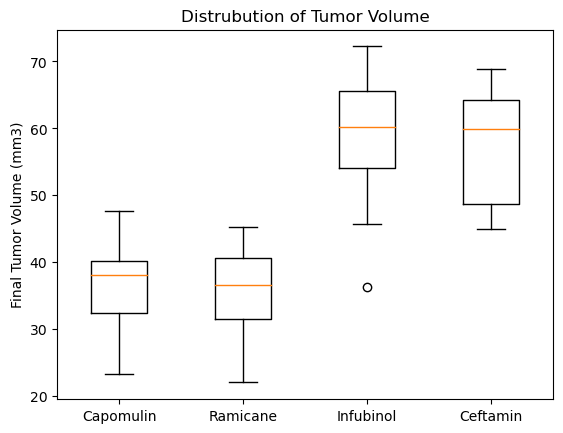

In [96]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [cap_tumors, ram_tumors, inf_tumors, ceft_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [107]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#pull tumor volumes for mouse with ID l509
mouse_line = cap.loc[cap["Mouse ID"] == "l509", :]
mouse_line

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
39,l509,0,Capomulin,Male,17,21,45.000000,0
582,l509,5,Capomulin,Male,17,21,45.851193,0
583,l509,10,Capomulin,Male,17,21,46.759074,0
584,l509,15,Capomulin,Male,17,21,47.488599,1
585,l509,20,Capomulin,Male,17,21,48.070452,2
586,l509,25,Capomulin,Male,17,21,44.006257,2
587,l509,30,Capomulin,Male,17,21,44.708055,2
588,l509,35,Capomulin,Male,17,21,40.207288,2
589,l509,40,Capomulin,Male,17,21,40.770813,2
590,l509,45,Capomulin,Male,17,21,41.483008,3


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

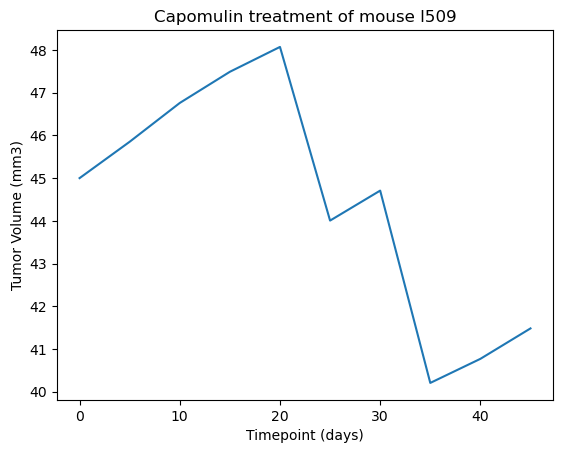

In [114]:
x_axis = mouse_line["Timepoint"]
y_axis = mouse_line["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

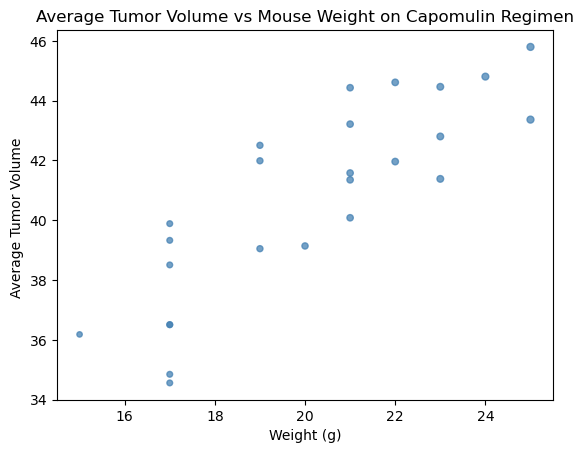

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#find average tumor volume on Capomulin
avg_cap = cap.groupby(["Mouse ID"]).mean()
avg_cap
x_axis = avg_cap["Weight (g)"]
y_axis = avg_cap["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue",
            s=x_axis, alpha=0.75)
plt.title("Average Tumor Volume vs Mouse Weight on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume ")
plt.show();

## Correlation and Regression

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

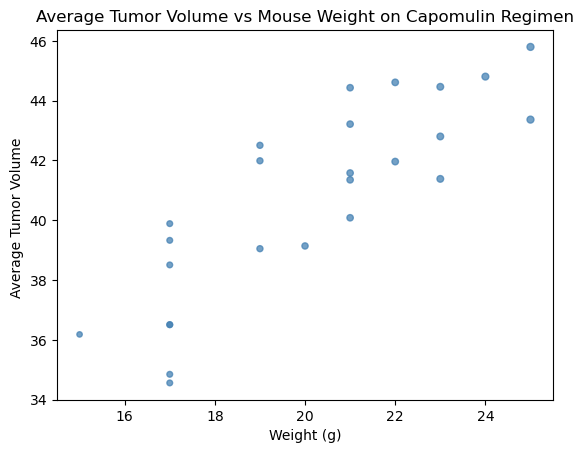

In [135]:
#use scatter plot from above
avg_cap = cap.groupby(["Mouse ID"]).mean()
avg_cap
x_axis = avg_cap["Weight (g)"]
y_axis = avg_cap["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue",
            s=x_axis, alpha=0.75)
plt.title("Average Tumor Volume vs Mouse Weight on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume ")
plt.show();

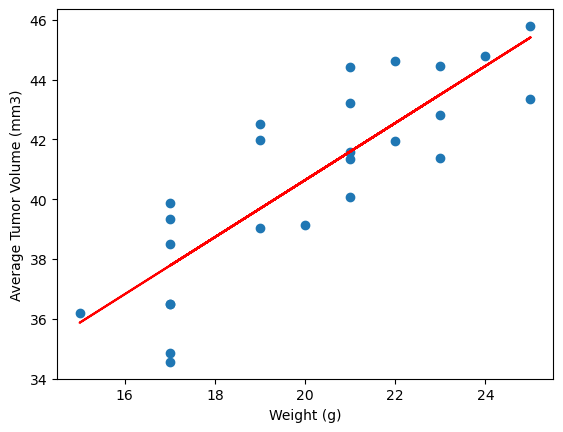

The correlation between mouse weight and average tumor volume is 0.84.


PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712586e-07)

In [146]:
# Add the linear regression equation and line to plot
x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

#correlation between mouse weight and average tumor volume

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")
correlation